In [1]:
import os
# CHANGE: remove logger/logging

import numpy as np
from tqdm import trange
import tensorflow as tf

from utils import *
from network import Network
from statistic import Statistic

import network
import statistic
import ops
import utils

# network 
# CHANGE: replaced flags with variables
model = "pixel_cnn"
batch_size = 100
hidden_dims = 16
recurrent_length = 7
out_hidden_dims = 32
out_recurrent_length = 2
use_residual = False

# training
max_epoch = 100 #100000
test_step = 100
save_step = 1000
learning_rate = 1e-3
grad_clip = 1
use_gpu = True

# data
data = "mnist"
data_dir = "data"
sample_dir = "samples"

# Debug
is_train = True 
display = False
log_level = "INFO"
random_seed = 123

# random seed
tf.set_random_seed(random_seed)
np.random.seed(random_seed)

def main(_):
    model_dir = "model"
    
    DATA_DIR = os.path.join(data_dir, data)
    SAMPLE_DIR = os.path.join(sample_dir, data, model_dir)

    check_and_create_dir(DATA_DIR)
    #check_and_create_dir(SAMPLE_DIR)
    SAMPLE_DIR = 'sample'

    # 0. prepare datasets
    if data == "mnist":
        from tensorflow.examples.tutorials.mnist import input_data
        mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

        next_train_batch = lambda x: mnist.train.next_batch(x)[0]
        next_test_batch = lambda x: mnist.test.next_batch(x)[0]

        height, width, channel = 28, 28, 1

        train_step_per_epoch = int(mnist.train.num_examples / batch_size)
        test_step_per_epoch = int(mnist.test.num_examples / batch_size)
    elif data == "cifar":
        from cifar10 import IMAGE_SIZE, inputs

        maybe_download_and_extract(DATA_DIR)
        images, labels = inputs(eval_data=False,
            data_dir=os.path.join(DATA_DIR, 'cifar-10-batches-bin'), batch_size=batch_size)

        height, width, channel = IMAGE_SIZE, IMAGE_SIZE, 3

    with tf.Session() as sess:
        network = Network(sess, height, width, channel)

        stat = Statistic(sess, data, model_dir, tf.trainable_variables(), test_step)
        stat.load_model()

        if is_train:
            print("Training starts!")

            initial_step = stat.get_t() if stat else 0
            iterator = trange(max_epoch, ncols=70, initial=initial_step)

            for epoch in iterator:
                # 1. train
                total_train_costs = []
                for idx in range(train_step_per_epoch):
                    images = binarize(next_train_batch(batch_size)).reshape([batch_size, height, width, channel])

                    cost = network.test(images, with_update=True)
                    total_train_costs.append(cost)

                # 2. test
                total_test_costs = []
                for idx in range(test_step_per_epoch):
                    images = binarize(next_test_batch(batch_size)).reshape([batch_size, height, width, channel])

                    cost = network.test(images, with_update=False)
                    total_test_costs.append(cost)

                avg_train_cost, avg_test_cost = np.mean(total_train_costs), np.mean(total_test_costs)

                stat.on_step(avg_train_cost, avg_test_cost)
                print("Epoch: {}".format(epoch))
                print("train l: {}, test l: {}".format(avg_train_cost, avg_test_cost))
                print()
                
            iterator.set_description("train l: %.3f, test l: %.3f" % (avg_train_cost, avg_test_cost))

            # 3. generate samples
            samples = network.generate()
            save_images(samples, height, width, 10, 10,
                directory=SAMPLE_DIR, prefix="epoch_%s" % epoch)

        else:
            print("Image generation starts!")

            samples = network.generate()
            save_images(samples, height, width, 10, 10, directory=SAMPLE_DIR)
            
        print('Errors:')
        print(avg_train_cost)
        print(avg_test_cost)

if __name__ == "__main__":
    tf.app.run()

Skip creating directory: data\mnist
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\mnist\t10k-images-idx3-ubyte.gz
Extracting data\mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Building pixel_cnn starts!
Building conv_inputs
[conv2d_a] conv_inputs : Placeholder:0 (?, 28, 28, 1) -> conv_inputs/outputs_plus_b:0 (?, 28, 28, 16)
[conv2d_b] CONV0 : conv_inputs/outputs_plus_b:0 (?, 28, 28, 16) -> CONV0/outputs_plus_b:0 (?, 28, 28, 3)
Building C

 17%|██████▊                                 | 17/100 [00:00<?, ?it/s]

Saving checkpoints...
Epoch: 0
train l: 0.13363231718540192, test l: 0.13255466520786285



 18%|█████▏                       | 18/100 [03:06<4:15:12, 186.73s/it]

Saving checkpoints...
Epoch: 1
train l: 0.13362258672714233, test l: 0.13358397781848907



 19%|█████▌                       | 19/100 [06:34<4:20:32, 192.99s/it]

Saving checkpoints...
Epoch: 2
train l: 0.13352586328983307, test l: 0.1325414627790451



 20%|█████▊                       | 20/100 [09:42<4:15:27, 191.59s/it]

Saving checkpoints...
Epoch: 3
train l: 0.1335100531578064, test l: 0.1325889676809311



 21%|██████                       | 21/100 [13:27<4:25:22, 201.55s/it]

Saving checkpoints...
Epoch: 4
train l: 0.13353125751018524, test l: 0.13258469104766846



 22%|██████▍                      | 22/100 [16:54<4:24:02, 203.11s/it]

Saving checkpoints...
Epoch: 5
train l: 0.13347630202770233, test l: 0.1326846033334732



 23%|██████▋                      | 23/100 [20:17<4:20:38, 203.10s/it]

Saving checkpoints...
Epoch: 6
train l: 0.13345788419246674, test l: 0.13265575468540192



 24%|██████▉                      | 24/100 [23:47<4:20:09, 205.39s/it]

Saving checkpoints...
Epoch: 7
train l: 0.13345149159431458, test l: 0.13292798399925232



 25%|███████▎                     | 25/100 [27:09<4:15:22, 204.30s/it]

Saving checkpoints...
Epoch: 8
train l: 0.1334342509508133, test l: 0.13323280215263367



 26%|███████▌                     | 26/100 [30:39<4:14:03, 205.99s/it]

Saving checkpoints...
Epoch: 9
train l: 0.13341009616851807, test l: 0.13247300684452057



 27%|███████▊                     | 27/100 [33:57<4:07:31, 203.45s/it]

Saving checkpoints...
Epoch: 10
train l: 0.13343772292137146, test l: 0.13261963427066803



 28%|████████                     | 28/100 [37:11<4:00:53, 200.75s/it]

Saving checkpoints...
Epoch: 11
train l: 0.13338828086853027, test l: 0.13330242037773132



 29%|████████▍                    | 29/100 [40:24<3:54:50, 198.46s/it]

Saving checkpoints...
Epoch: 12
train l: 0.1333412230014801, test l: 0.13229747116565704



 30%|████████▋                    | 30/100 [43:41<3:50:47, 197.82s/it]

Saving checkpoints...
Epoch: 13
train l: 0.13336463272571564, test l: 0.13240209221839905



 31%|████████▉                    | 31/100 [46:57<3:47:06, 197.49s/it]

Saving checkpoints...
Epoch: 14
train l: 0.13331252336502075, test l: 0.13298560678958893



 32%|█████████▎                   | 32/100 [50:14<3:43:39, 197.35s/it]

Saving checkpoints...
Epoch: 15
train l: 0.1332969218492508, test l: 0.132410928606987



 33%|█████████▌                   | 33/100 [53:30<3:39:50, 196.88s/it]

Saving checkpoints...
Epoch: 16
train l: 0.13330604135990143, test l: 0.13259556889533997



 34%|█████████▊                   | 34/100 [56:51<3:37:47, 198.00s/it]

Saving checkpoints...
Epoch: 17
train l: 0.13333487510681152, test l: 0.13258282840251923



 35%|█████████▍                 | 35/100 [1:00:10<3:34:48, 198.28s/it]

Saving checkpoints...
Epoch: 18
train l: 0.1332557052373886, test l: 0.13222450017929077



 36%|█████████▋                 | 36/100 [1:03:28<3:31:30, 198.28s/it]

Saving checkpoints...
Epoch: 19
train l: 0.1332300752401352, test l: 0.13254950940608978



 37%|█████████▉                 | 37/100 [1:06:45<3:27:43, 197.83s/it]

Saving checkpoints...
Epoch: 20
train l: 0.1331910789012909, test l: 0.13228096067905426



 38%|██████████▎                | 38/100 [1:10:00<3:23:29, 196.93s/it]

Saving checkpoints...
Epoch: 21
train l: 0.13322755694389343, test l: 0.13251231610774994



 39%|██████████▌                | 39/100 [1:13:17<3:20:22, 197.09s/it]

Saving checkpoints...
Epoch: 22
train l: 0.1331428736448288, test l: 0.13233770430088043



 40%|██████████▊                | 40/100 [1:16:33<3:16:50, 196.83s/it]

Saving checkpoints...
Epoch: 23
train l: 0.1331636756658554, test l: 0.1327100694179535



 41%|███████████                | 41/100 [1:19:47<3:12:36, 195.87s/it]

Saving checkpoints...
Epoch: 24
train l: 0.13318251073360443, test l: 0.1322735846042633



 42%|███████████▎               | 42/100 [1:21:54<2:49:27, 175.30s/it]

Saving checkpoints...
Epoch: 25
train l: 0.13318811357021332, test l: 0.13215063512325287



 43%|███████████▌               | 43/100 [1:24:22<2:38:48, 167.16s/it]

Saving checkpoints...
Epoch: 26
train l: 0.13311004638671875, test l: 0.132135272026062



 44%|███████████▉               | 44/100 [1:26:55<2:31:56, 162.80s/it]

Saving checkpoints...
Epoch: 27
train l: 0.13317537307739258, test l: 0.13234733045101166



 45%|████████████▏              | 45/100 [1:29:24<2:25:20, 158.56s/it]

Saving checkpoints...
Epoch: 28
train l: 0.13311809301376343, test l: 0.13217897713184357



 46%|████████████▍              | 46/100 [1:31:53<2:20:12, 155.78s/it]

Saving checkpoints...
Epoch: 29
train l: 0.1332017034292221, test l: 0.13312450051307678



 47%|████████████▋              | 47/100 [1:34:24<2:16:21, 154.37s/it]

Saving checkpoints...
Epoch: 30
train l: 0.13316379487514496, test l: 0.13231439888477325



 48%|████████████▉              | 48/100 [1:36:53<2:12:18, 152.67s/it]

Saving checkpoints...
Epoch: 31
train l: 0.13312585651874542, test l: 0.13294830918312073



 49%|█████████████▏             | 49/100 [1:39:23<2:09:16, 152.09s/it]

Saving checkpoints...
Epoch: 32
train l: 0.1331140398979187, test l: 0.13230235874652863



 50%|█████████████▌             | 50/100 [1:41:56<2:06:51, 152.23s/it]

Saving checkpoints...
Epoch: 33
train l: 0.13308587670326233, test l: 0.1321941465139389



 51%|█████████████▊             | 51/100 [1:44:31<2:04:58, 153.02s/it]

Saving checkpoints...
Epoch: 34
train l: 0.13307474553585052, test l: 0.1323259472846985



 52%|██████████████             | 52/100 [1:47:10<2:03:45, 154.70s/it]

Saving checkpoints...
Epoch: 35
train l: 0.13304650783538818, test l: 0.13232320547103882



 53%|██████████████▎            | 53/100 [1:49:22<1:55:55, 147.99s/it]

Saving checkpoints...
Epoch: 36
train l: 0.13306234776973724, test l: 0.13220350444316864



 54%|██████████████▌            | 54/100 [1:50:57<1:41:24, 132.28s/it]

Saving checkpoints...
Epoch: 37
train l: 0.13301727175712585, test l: 0.1324901133775711



 55%|██████████████▊            | 55/100 [1:52:34<1:31:13, 121.63s/it]

Saving checkpoints...
Epoch: 38
train l: 0.13303391635417938, test l: 0.13241448998451233



 56%|███████████████            | 56/100 [1:54:10<1:23:25, 113.76s/it]

Saving checkpoints...
Epoch: 39
train l: 0.13297362625598907, test l: 0.13241639733314514



 57%|███████████████▍           | 57/100 [1:55:43<1:17:07, 107.61s/it]

Saving checkpoints...
Epoch: 40
train l: 0.13305158913135529, test l: 0.1322520673274994



 58%|███████████████▋           | 58/100 [1:57:15<1:12:01, 102.89s/it]

Saving checkpoints...
Epoch: 41
train l: 0.1329982429742813, test l: 0.13218168914318085



 59%|████████████████▌           | 59/100 [1:58:46<1:07:53, 99.35s/it]

Saving checkpoints...
Epoch: 42
train l: 0.1329556703567505, test l: 0.13320329785346985



 60%|████████████████▊           | 60/100 [2:00:16<1:04:23, 96.58s/it]

Saving checkpoints...
Epoch: 43
train l: 0.13301418721675873, test l: 0.1329100877046585



 61%|█████████████████           | 61/100 [2:01:49<1:02:02, 95.46s/it]

Saving checkpoints...
Epoch: 44
train l: 0.13301752507686615, test l: 0.13217365741729736



 62%|██████████████████▌           | 62/100 [2:03:20<59:37, 94.15s/it]

Saving checkpoints...
Epoch: 45
train l: 0.13298624753952026, test l: 0.13263174891471863



 63%|██████████████████▉           | 63/100 [2:04:51<57:28, 93.19s/it]

Saving checkpoints...
Epoch: 46
train l: 0.13298891484737396, test l: 0.13207165896892548



 64%|███████████████████▏          | 64/100 [2:06:24<55:49, 93.05s/it]

Saving checkpoints...
Epoch: 47
train l: 0.13299395143985748, test l: 0.1319020390510559



 65%|███████████████████▌          | 65/100 [2:07:56<54:07, 92.77s/it]

Saving checkpoints...
Epoch: 48
train l: 0.13291773200035095, test l: 0.13224445283412933



 66%|███████████████████▊          | 66/100 [2:09:26<52:10, 92.09s/it]

Saving checkpoints...
Epoch: 49
train l: 0.13294030725955963, test l: 0.13231557607650757



 67%|████████████████████          | 67/100 [2:10:57<50:28, 91.79s/it]

Saving checkpoints...
Epoch: 50
train l: 0.13293251395225525, test l: 0.1321897804737091



 68%|████████████████████▍         | 68/100 [2:12:27<48:39, 91.25s/it]

Saving checkpoints...
Epoch: 51
train l: 0.1330103725194931, test l: 0.13206878304481506



 69%|████████████████████▋         | 69/100 [2:13:57<46:58, 90.92s/it]

Saving checkpoints...
Epoch: 52
train l: 0.13292288780212402, test l: 0.13250942528247833



 70%|█████████████████████         | 70/100 [2:15:29<45:35, 91.18s/it]

Saving checkpoints...
Epoch: 53
train l: 0.13296130299568176, test l: 0.13219529390335083



 71%|█████████████████████▎        | 71/100 [2:16:58<43:47, 90.60s/it]

Saving checkpoints...
Epoch: 54
train l: 0.13293170928955078, test l: 0.13246266543865204



 72%|█████████████████████▌        | 72/100 [2:18:30<42:25, 90.91s/it]

Saving checkpoints...
Epoch: 55
train l: 0.13292722404003143, test l: 0.13244597613811493



 73%|█████████████████████▉        | 73/100 [2:20:01<40:56, 90.99s/it]

Saving checkpoints...
Epoch: 56
train l: 0.1329415887594223, test l: 0.13271048665046692



 74%|██████████████████████▏       | 74/100 [2:21:33<39:29, 91.14s/it]

Saving checkpoints...
Epoch: 57
train l: 0.13286824524402618, test l: 0.13223427534103394



 75%|██████████████████████▌       | 75/100 [2:23:04<37:56, 91.08s/it]

Saving checkpoints...
Epoch: 58
train l: 0.13288865983486176, test l: 0.13284631073474884



 76%|██████████████████████▊       | 76/100 [2:24:34<36:23, 90.96s/it]

Saving checkpoints...
Epoch: 59
train l: 0.1328446865081787, test l: 0.13212114572525024



 77%|███████████████████████       | 77/100 [2:26:06<34:58, 91.24s/it]

Saving checkpoints...
Epoch: 60
train l: 0.13288138806819916, test l: 0.13255681097507477



 78%|███████████████████████▍      | 78/100 [2:27:38<33:27, 91.26s/it]

Saving checkpoints...
Epoch: 61
train l: 0.13286802172660828, test l: 0.13209934532642365



 79%|███████████████████████▋      | 79/100 [2:29:09<31:54, 91.16s/it]

Saving checkpoints...
Epoch: 62
train l: 0.13285794854164124, test l: 0.1328834742307663



 80%|████████████████████████      | 80/100 [2:30:48<31:11, 93.56s/it]

Saving checkpoints...
Epoch: 63
train l: 0.1328921616077423, test l: 0.13239526748657227



 81%|████████████████████████▎     | 81/100 [2:32:24<29:54, 94.43s/it]

Saving checkpoints...
Epoch: 64
train l: 0.13280430436134338, test l: 0.1320844143629074



 82%|████████████████████████▌     | 82/100 [2:33:56<28:03, 93.51s/it]

Saving checkpoints...
Epoch: 65
train l: 0.1328841894865036, test l: 0.1326066255569458



 83%|████████████████████████▉     | 83/100 [2:35:36<27:06, 95.69s/it]

Saving checkpoints...
Epoch: 66
train l: 0.13282418251037598, test l: 0.1320812851190567



 84%|█████████████████████████▏    | 84/100 [2:37:10<25:23, 95.23s/it]

Saving checkpoints...
Epoch: 67
train l: 0.13278503715991974, test l: 0.13179455697536469



 85%|█████████████████████████▌    | 85/100 [2:38:56<24:35, 98.37s/it]

Saving checkpoints...
Epoch: 68
train l: 0.13281580805778503, test l: 0.1321541666984558



 86%|█████████████████████████▊    | 86/100 [2:40:32<22:46, 97.63s/it]

Saving checkpoints...
Epoch: 69
train l: 0.13284029066562653, test l: 0.13179391622543335



 87%|██████████████████████████    | 87/100 [2:42:17<21:37, 99.82s/it]

Saving checkpoints...
Epoch: 70
train l: 0.13279634714126587, test l: 0.131952702999115



 88%|█████████████████████████▌   | 88/100 [2:45:13<24:32, 122.70s/it]

Saving checkpoints...
Epoch: 71
train l: 0.1327953338623047, test l: 0.13219313323497772



 89%|█████████████████████████▊   | 89/100 [2:48:01<24:59, 136.35s/it]

Saving checkpoints...
Epoch: 72
train l: 0.1328369677066803, test l: 0.13184767961502075



 90%|██████████████████████████   | 90/100 [2:50:40<23:49, 142.93s/it]

Saving checkpoints...
Epoch: 73
train l: 0.1327729970216751, test l: 0.13218377530574799



 91%|██████████████████████████▍  | 91/100 [2:53:25<22:26, 149.61s/it]

Saving checkpoints...
Epoch: 74
train l: 0.13272996246814728, test l: 0.13179117441177368



 92%|██████████████████████████▋  | 92/100 [2:56:00<20:10, 151.32s/it]

Saving checkpoints...
Epoch: 75
train l: 0.1327909231185913, test l: 0.1318824738264084



 93%|██████████████████████████▉  | 93/100 [2:58:38<17:53, 153.36s/it]

Saving checkpoints...
Epoch: 76
train l: 0.1327839344739914, test l: 0.13204145431518555



 94%|███████████████████████████▎ | 94/100 [3:01:18<15:31, 155.33s/it]

Saving checkpoints...
Epoch: 77
train l: 0.13280676305294037, test l: 0.1320800632238388



 95%|███████████████████████████▌ | 95/100 [3:04:03<13:11, 158.28s/it]

Saving checkpoints...
Epoch: 78
train l: 0.1327359974384308, test l: 0.13255970180034637



 96%|███████████████████████████▊ | 96/100 [3:06:50<10:42, 160.72s/it]

Saving checkpoints...
Epoch: 79
train l: 0.13270674645900726, test l: 0.13292071223258972



 97%|████████████████████████████▏| 97/100 [3:09:35<08:06, 162.25s/it]

Saving checkpoints...
Epoch: 80
train l: 0.1327040195465088, test l: 0.13210591673851013



 98%|████████████████████████████▍| 98/100 [3:12:25<05:29, 164.55s/it]

Saving checkpoints...
Epoch: 81
train l: 0.13276360929012299, test l: 0.13251756131649017



 99%|████████████████████████████▋| 99/100 [3:15:06<02:43, 163.26s/it]

Saving checkpoints...
Epoch: 82
train l: 0.1327229142189026, test l: 0.13182120025157928



100%|████████████████████████████| 100/100 [3:17:33<00:00, 158.61s/it]

Saving checkpoints...
Epoch: 83
train l: 0.13272276520729065, test l: 0.13249030709266663



101it [3:20:06, 156.69s/it]                                           

Saving checkpoints...
Epoch: 84
train l: 0.13271163403987885, test l: 0.1319563239812851



102it [3:22:32, 153.65s/it]

Saving checkpoints...
Epoch: 85
train l: 0.13276927173137665, test l: 0.1320888102054596



103it [3:24:58, 151.40s/it]

Saving checkpoints...
Epoch: 86
train l: 0.1326819360256195, test l: 0.13178998231887817



104it [3:27:23, 149.53s/it]

Saving checkpoints...
Epoch: 87
train l: 0.13271677494049072, test l: 0.13221509754657745



105it [3:29:58, 151.13s/it]

Saving checkpoints...
Epoch: 88
train l: 0.1326720267534256, test l: 0.1320783942937851



106it [3:32:27, 150.25s/it]

Saving checkpoints...
Epoch: 89
train l: 0.13265833258628845, test l: 0.13186253607273102



107it [3:35:00, 151.34s/it]

Saving checkpoints...
Epoch: 90
train l: 0.13269086182117462, test l: 0.13233697414398193



108it [3:37:34, 151.95s/it]

Saving checkpoints...
Epoch: 91
train l: 0.1327274739742279, test l: 0.1323351413011551



109it [3:40:03, 151.16s/it]

Saving checkpoints...
Epoch: 92
train l: 0.1327134221792221, test l: 0.13228179514408112



110it [3:42:35, 151.32s/it]

Saving checkpoints...
Epoch: 93
train l: 0.13266371190547943, test l: 0.13180428743362427



111it [3:45:06, 151.37s/it]

Saving checkpoints...
Epoch: 94
train l: 0.13267762959003448, test l: 0.1318771243095398



112it [3:47:35, 150.67s/it]

Saving checkpoints...
Epoch: 95
train l: 0.13268418610095978, test l: 0.13237883150577545



113it [3:50:08, 151.27s/it]

Saving checkpoints...
Epoch: 96
train l: 0.13259665668010712, test l: 0.1327395886182785



114it [3:52:44, 152.68s/it]

Saving checkpoints...
Epoch: 97
train l: 0.1326618492603302, test l: 0.1320166438817978



115it [3:55:24, 154.82s/it]

Saving checkpoints...
Epoch: 98
train l: 0.13267546892166138, test l: 0.1317576766014099



116it [3:58:03, 156.17s/it]

Saving checkpoints...
Epoch: 99
train l: 0.13270217180252075, test l: 0.13199162483215332



117it [4:00:48, 158.83s/it]


============== ( 0,  0) ==============
#                           
                            
                            
   #     #                  
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
       #                    
                            
                            
         #                  
                            
                            
                            
              #             
                            
                            
============== ( 0,  1) ==============
                            
#                           
                            
                       

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
       #                    
============== ( 0, 10) ==============
  #                         
#                           
                            
                            
                            
                            
                            
                            
                            
                            
    #                       
                            
                            
                            
                            
                            
  #                         
                            
               #            
   #                        
                            
                            
    

                  #         
                   #        
                            
                            
                            
                            
                            
                            
                            
                            
                            
       #                    
                            
                            
                            
                  #         
                            
                            
                            
                            
                            
                            
============== ( 0, 20) ==============
  #                         
#                           
                            
                            
                            
                            
            #               
                            
                            
                            
                            
    

                            
                            
               #            
                            
============== ( 1,  1) ==============
                         #  
#                    #####  
#                           
                            
                            
                            
          #                 
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
            #               
         #                  
                            
                            
                            
 #                          
                            
                            
                            
                            
                            
============== ( 1,  2) =========

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                           #
                            
============== ( 1, 11) ==============
 ##                       # 
 #            #          #  
#                           
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

#                           
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
              #             
                      #     
                            
                            
                            
                            
     #                      
                            
                            
                            
                            
                            
============== ( 1, 21) ==============
                        #   
#                    ##  #  
                            
                            
         #                  
                          # 
                            
    

                            
           #                
                            
                            
                            
                            
                            
                            
============== ( 2,  2) ==============
  #                     # # 
##                   # ###  
#                    ##  ## 
                            
    #                       
                            
                            
                            
                            
     #                      
                            
                            
             #              
                            
                       #    
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
 #                          
                            
                            
                            
                   #        
                            
                   #        
                            
============== ( 2, 12) ==============
 #                      ### 
#                     ##### 
#                   # # #   
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

#                   ##### # 
                #  # #   # #
                            
                            
                            
                      #     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 3,  2) ==============
 #                        # 
#                     ###   
                      ####  
 #                ###     ##
                            
       #                    
                            
    

                            
                            
                         #  
                            
                            
                            
                            
             #              
============== ( 3, 11) ==============
                          # 
#                    # ### #
#            #     ######   
                 #### # #   
                            
                            
       #                    
           #                
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
        #                   
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                  #         
                            
                            
                            
============== ( 3, 21) ==============
                        # # 
#                     ######
                    ######  
                 # # # # ## 
                  # #       
                            
                            
                            
                            
                            
                      #     
                            
                            
                            
    

                            
                            
                            
============== ( 4, 16) ==============
 #       #                # 
 #                   #### # 
#       #           ### # # 
                  ## #####  
                  ##        
                            
                            
                            
                    #       
                            
                            
                            
                            
                            
                            
                            
                            
                            
          #                 
                            
                            
                            
                            
                            
                            
                            
        #                   
                            
============== ( 4, 17) ==============
                       

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 4, 26) ==============
  #                         
##                    ##### 
                    ##### # 
                 ## ###     
                  #  ##     
                 #   #      
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                 #          
                            
                            
    

                            
                     #      
                            
============== ( 5, 20) ==============
                        ##  
##                    ### # 
#                  ##### ## 
                   ##### #  
          #        ####     
      #           ###       
    #       #  #  #         
                            
                            
                            
                            
                            
                            
                            
                            
                            
                      #     
                            
                            
                            
                         #  
                            
                            
                            
                            
                            
                            
                            
============== ( 5, 21) ==============
                  #    

#    #                      
                            
                            
                            
                            
                            
                            
                            
                            
                            
 #                          
                            
                            
                      #     
============== ( 6,  2) ==============
 #                        # 
 #                    # ### 
                     ###### 
                 # ######   
                 #####      
                # ####      
                 ## #  #    
                            
                            
                            
                            
                            
                            
                            
#                           
   #                        
                            
                            
                            
    

                  ##        
           #     ## # #     
                # ##        
                            
                            
                            
                            
                            
                            
                            
                   #        
                            
                            
                            
                            
                            
                            
       #                    
                            
                            
                            
                            
                            
============== ( 7,  6) ==============
                        # # 
                      ###   
#                   ####### 
                   # #####  
                   ####     
                  ####      
                 #####      
                #      #    
                            
                            
    

                            
                           #
                 #          
                            
                            
============== ( 7, 15) ==============
 ##                      ## 
                      ####  
#                    ## ##  
                  # ####    
                   #####    
                  ##        
                 #####      
               ###          
                            
             #              
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                  #         
                            
                            
                          # 
                            
                            
====

                            
                            
                            
                            
                            
                            
                            
                            
                            
              #             
                            
                            
                            
                            
                            
                            
============== ( 7, 25) ==============
                        #   
 #                    #### #
#                   #### ## 
                   ## ###   
                   # ###    
                  ###       
                ######      
                #####       
               # #   #      
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
 #                          
                            
                            
                            
          #                 
                            
                            
                            
                         #  
                            
                            
         #                  
                            
                            
                            
                            
                            
============== ( 8, 13) ==============
 #                      # # 
##                   ##### #
#                   ####### 
                ##### ###  #
                #  ####     
                  ###       
                   ###      
                #### #      
                     #      
                            
                            
                            
                            
      #                     
                            
    

============== ( 8, 22) ==============
 ##                     # # 
#                     ####  
#                   ######  
                   ### # #  
         #         ###      
                 ####       
                ######      
                # ####      
                   # ##     
                    #       
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
        #                   
                            
                            
                            
                            
============== ( 8, 23) ==============
 ##                         
##                    ######
#                  #######  
                  #####

                  ###       
                #  ###      
             #  #####       
                ##  ##      
                   ##       
                     ##     
                            
                            
                            
                #           
                            
                            
                            
                            
                            
                            
             #              
                            
                            
                            
                            
                            
                            
============== (10,  0) ==============
 #                      # # 
#                     ##### 
                   ######## 
     #            ########  
                   #### #   
                  ####      
                #### #      
              #######       
               #  ### #     
                   # ## #   
    

                            
                            
                            
                            
                            
============== (10,  9) ==============
 #                      #   
#                     # ##  
#                  # #####  
#                  ##### #  
                  ######    
                 ###        

                      ####  
#                   ######  
                   #######  
                   #####    
                  ##        
               # ###### #   
               ###### #     
               # #  #       
                    ####    
                     #      
                            
                     #      
                            
                            
                            
                            
              #             
                            
                            
                            
                            
                            
   

               ## #####     
               #    # #     
                    # ##    
                     #      
                   #        
                            
                            
                            
                            
                            
                            
                            
                    #       
                            
                            
                            
                            
                            
                            
                            
                            
============== (11, 15) ==============
  #                     #  #
###   #               ##### 
                   #######  
              # # # #####   
                   ####     
                  ##        
                 ####       
               ###  ##      
                    ##      
                   ## #     
                    ##      
                    # #     
    

                            
                            
                            
                            
                            
                            
============== (12, 19) ==============
  #                     ### 
##                   # #####
##                  ####### 
                 # ### # # #
                  ######    
                  ## #      
                 #### #     
                 ###        
              #     #   #   
                    # #     
                     #      
                   #        
                 # ##       
                            
                            
 #                          
                            
            #   #           
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                    #       
                  ###    # #
                  # #   #   
                            
       #                    
                            
                            
                            
                            
                            
                      #     
                            
                            
                            
                            
                            
                            
============== (13,  1) ==============
                         #  
#                     ### # 
#                  ######## 
                    ######  
            #      ####     
                 ####       
                #####       
              # ###  #      
  #               ###       
                  ### ##    
                    ##      
                    #       
                   #     #  
                  ###  #    
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (14,  6) ==============
 #                      #   
#                  #  ######
                    ####### 
                   #######  
             #    ######    
                  ## #      
                 #### #     
                # ##        
               #   ## #     
                   ## #     
                     #      
               #   ##       
                   ##   ##  
                    # ####  
                      ######
               #            
                            
                            
                            
                            
                            
                            
                            
    

               ## ###       
             #   #  ## #    
                   # ##     
         #        #  #      
                   ##       
                 #  ##     #
                  ###### #  
                 ###    # # 
                            
                            
                            
                            
                            
                            
                            
                            
    #                       
                            
                            
                            
                            
                            
                            
                            
                            
============== (15, 12) ==============
 #                      #   
 #                    ####  
#                   ####### 
                   ### ###  
                #  ###      
                  ####     #
                 ####       
                ##### #     
    

                            
                   #        
                            
                            
    #                       
                            
                            
============== (15, 21) ==============
 ##                      #  
##                   ##### #
#                   ### ### 
                 # ######## 
                  #####     
                  ###       
                 ###        
             #  ##### #     
              #     ##      
                    # #     
                     #      
                   ##       
                   ##    #  
                   ##  #### 
                  ###  #### 
                  # # ##    
                            
                            
            #               
                            
        #                   
                            
                            
                         #  
                            
                            
    

                     #      
                    ##      
                   ##     # 
                   ###  ## #
                ## # ###### 
                   #  ##### 
                      ##### 
                     ##     
                            
                #           
                            
                            
                            
                            
                            
                            
                            
                            
============== (16, 26) ==============
                            
                     #######
#                   ####### 
                 #  ##  #   
                 # ####     
                 ####       
                ######      
        #      #####  #     
              # # # ###     
                      #     
                    ##      
                     #      
                  ###   ##  
                   ##  ### #
                 # # # #### 
    

============== (17,  7) ==============
                          # 
               #       ###  
#                   ####### 
                    ###### #
                   ####     
                  ###       
                #######     
                #  ##       
             ###    # #     
                  ######    
                     #      
                    #       
                       # #  
                   ## ######
                 ##### #####
          #       ## #######
                   #  ######
             #        # # ##
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (17,  8) ==============
 #                      # ##
                      ###   
#                   ######  
                    ###

                   # #      
                  ###   # # 
                   ## # ####
               # # ### #####
                  ### ##### 
                  #    #####
                    # # ##  
                            
                            
           #                
                            
                            
                            
                            
                            
                            
                            
============== (18, 12) ==============
                          # 
#                     ### ##
#                   #### ## 
                 #  ###### #
                  #####     
                  ###       
                #####       
              # #####       
                #    #      
                   ####     
                     #      
   #         #      #       
                 # #   # ###
                   ## #### #
                 ### # # ###
                 ## ###### #
    

 #                      #   
##                  #  ## # 
#                   ####### 
                 # ## ###   
                   ## #     
                  ###       
                 #####      
              # ##### #     
                ### # #     
                   # ###    
                    ##      
                   ##       
                     # #   #
                  ###   ### 
          #      #### ##### 
                    ########
                       ## ##
                     ## ## #
         #                # 
                            
                          # 
              #             
                            
                            
                            
                            
                            
                            
============================ (19, 18) ==============
     #                     #
  #                   ##### 
#                   # ##### 
          #       # ## #   #
                   

                     ##  ## 
                      # ### 
                      ####  
                     #####  
                            
                            
                            
                            
                            
                    #       
                            
============== (19, 27) ==============
 ##                        #
##                   ##### #
                    ####### 
                  # ### ##  
                 ######     
                # ##        
                 ####     # 
                 #  #       
                  # #  #    
                  ### #     
                     ##     
                    ##      
                  # ##   # #
                   # ##### #
                  #  # ###  
               #  #### #### 
                       # ###
                      ## # #
                          # 
                       ###  
            #       # ##    
                            
    

                   ####### #
                   ####     
                 #####      
                 #### #     
               ## ###       
              #     ##      
                    ###     
                     #      
                    ##      
                   ###  # ##
                   ##   ### 
                  ### # ### 
                  #### #####
                      ### ##
                     ### #  
                        ### 
                      ## #  
             #       # ###  
                      ## #  
                            
                            
                            
                            
                            
                            
============== (21,  4) ==============
 #                      #   
#                      #####
#                 # ######  
                 ## #### # #
                  #######   
                 ####       
                #  # #      
               ##### #      
    

                      #     
                            
                            
                            
                            
                            
                            
============== (21, 13) ==============
 #                      # # 
##                    ##### 
#                   ####### 
                   ######  #
                   #####    
                  ##        
               # ####       
                ## #        
                 # ###      
                     ##     
                     #      
        #          ##       
                   ###   #  
                   ##  #### 
                  ###  #####
                  # # ######
                     ###### 
            ##        ## ###
                        ### 
                      ##### 
                       ###  
                      ##    
                            
                            
                #           
                            
    

                            
                            
                            
                            
            #               
============== (22, 18) ==============
             #          # # 
##                    ### # 
                    ####### 
                   #######  
                 # ####     
                  ####      
               ######       
              ### ### #     
              ### # ## #    
                      #     
                     #      
                    #       
                 # ### #   #
                  ### # ##  
                  ### ##### 
                  #######   
                #      ##  #
                      ## ###
                        ### 
                       ##   
                     #####  
                     ####   
                  # #       
                            
                            
                            
                            
                            
====

                  #### # #  
                  ####  ### 
                  ## # #####
                 #### # ####
                  #    #####
                      #  ###
                        ### 
                       ###  
                      ###   
                   # ###    
                   ####     
                 # #        
                            
                            
                            
                            
============== (23,  0) ==============
 #                      #   
##                    ###  #
# #                 ####### 
                   ### # #  
                  ####      
                 #####      
               #######      
                #######     
                #  ###      
                   # ###    
                    ###     
   #                #       
                   #   # #  
                   #### ## #
                 # # # #####
                   ## ### # 
                  #   #### #
    

                    #       
                   ##       
                 # ##   ##  
   #               ## ##### 
                #  ## ######
                   # # #### 
                      ## # #
                        ##  
                       ## # 
                    # ####  
                     ####   
                   ####     
    #   ##      #######     
     ###             ##     
                            
                            
                            
============== (24,  5) ==============
                            
                      ##### 
#                   ####### 
                   #### ##  
                   #### #   
                  ###       
                 ## ##      
              # ### ###     
               ## ####      
                    ###     
                     ##     
                    #       
                  ##    #  #
                   ##  #####
                 # ##  #####
                 ## #  ###  
    

                      ## #  
                        ### 
                       ##   
                     ####   
                     ##  #  
                  ####      
        ##       #####      
        ####   #######      
       ###    ###           
                            
                            
============== (25,  9) ==============
 ##                         
#                     ####  
                   #######  
                    #####  #
   #               ##       
                  ###       
                #######     
               ## ## #      
                 #  ## #    
                   # ###    
                    ##      
                   #        
                  #    # #  
                  ##  # ####
                 ####  #####
                    # ######
                       ###  
                     ## ####
                        ### 
                        ##  
                       ##   
                     ###    
    

               #######      
                ######      
              ##  # ##      
                   ####     
                   # #      
                    ##      
                   ##  #    
                   ## ##### 
                 ####  #### 
                  ## # #### 
                       #####
                       # ###
                        ##  
                       ##   
                     # ##   
                     ####   
             #     ####     
        #        ######     
      #### #    ## ####     
       ### ########         
      ##  #   ##     #      
                            
============== (25, 19) ==============
                          # 
#                      ###  
#                   ######  
                  ######### 
                  ###  ##   
#               # # #       
                 #####      
                ######      
              ###    #      
                   ####     
                     #      
    

                #  ###      
                  ##        
                ######      
                ######      
                 ## ###     
                   ## #     
                    ##      
                   ##       
                  ###      #
                  ###    ## 
                 # ### # ## 
                 ####  #####
                 #     #####
                     # #####
                        ##  
                       #    
                      ##### 
                     ##  #  
                  #####     
        ##       ## ###     
       # ###   ####### #    
        ##############      
    #   # ### ######        
       ###  ## #            
============== (26, 24) ==============
                         ## 
##       #            ##### 
                    ######  
                  # ###  #  
                   ### #    
                  #####     
                 #####      
              # # ####      
              #     ####    
    

                    ## #    
#       ##       ######     
      #####     ######      
     # ### #  # #####       
     # ########## ###       
     ## ##  # # #           
============== (27,  5) ==============
 #                        # 
#                     #### #
#                  ##### ###
                  ########  
                  #####     
                  ###       
                 #####      
                # # #       
               ##  ##       
                   # #      
                     #      
                   ##       
                  # ##   #  
                   ## ##### 
                 ### # #####
                 #  ######  
                      ##### 
                     ## ##  
                        ##  
                       ##   
                      # #   
                     ###    
                   ###      
        ###      ## #  #    
        #      #######      
      # ###  # #######      
        ### ## ###  #       
    

In [2]:
train_err = [0.24605496227741241, 0.13720448315143585,\
             0.1365453600883484, 0.13613757491111755, \
             0.13572151958942413, 0.1353251338005066,\
             0.135013148188591, 0.13462430238723755,\
             0.1343553215265274, 0.13414210081100464,\
             0.1340470016002655, 0.13391567766666412,\
             0.13378024101257324, 0.13375551998615265,\
             0.1336555927991867, 0.1336013525724411,\
             0.13363231718540192,  0.13362258672714233, \
             0.13352586328983307, 0.1335100531578064, \
             0.13353125751018524, 0.13347630202770233, \
             0.13345788419246674, 0.13345149159431458, \
             0.1334342509508133, 0.13341009616851807, \
             0.13343772292137146, 0.13338828086853027, \
             0.1333412230014801, 0.13336463272571564, \
             0.13331252336502075, 0.1332969218492508, \
             0.13330604135990143, 0.13333487510681152, \
             0.1332557052373886, 0.1332300752401352, \
             0.1331910789012909, 0.13322755694389343, \
             0.1331428736448288, 0.1331636756658554, \
             0.13318251073360443, 0.13318811357021332, \
             0.13311004638671875, 0.13317537307739258, \
             0.13311809301376343, 0.1332017034292221, \
             0.13316379487514496, 0.13312585651874542, \
             0.1331140398979187, 0.13308587670326233, \
             0.13307474553585052, 0.13304650783538818, \
             0.13306234776973724, 0.13301727175712585, \
             0.13303391635417938, 0.13297362625598907, \
             0.13305158913135529, 0.1329982429742813, \
             0.1329556703567505, 0.13301418721675873, \
             0.13301752507686615, 0.13298624753952026, \
             0.13298891484737396, 0.13299395143985748, \
             0.13291773200035095, 0.13294030725955963, \
             0.13293251395225525, 0.1330103725194931, \
             0.13292288780212402, 0.13296130299568176, \
             0.13293170928955078, 0.13292722404003143, \
             0.1329415887594223, 0.13286824524402618, \
             0.13288865983486176, 0.1328446865081787, \
             0.13288138806819916, 0.13286802172660828, \
             0.13285794854164124, 0.1328921616077423, \
             0.13280430436134338, 0.1328841894865036, \
             0.13282418251037598, 0.13278503715991974, \
             0.13281580805778503, 0.13284029066562653, \
             0.13279634714126587, 0.1327953338623047, \
             0.1328369677066803, 0.1327729970216751, \
             0.13272996246814728, 0.1327909231185913, \
             0.1327839344739914, 0.13280676305294037, \
             0.1327359974384308, 0.13270674645900726, \
             0.1327040195465088, 0.13276360929012299, \
             0.1327229142189026, 0.13272276520729065]

In [3]:
test_err = [0.13751590251922607, 0.13724683225154877,\
            0.13562853634357452, 0.1356244683265686,\
            0.13565725088119507, 0.13435082137584686,\
            0.13500544428825378, 0.13368146121501923,\
            0.1336456537246704, 0.1330556422472,\
            0.13352327048778534, 0.1328164041042328,\
            0.1330333799123764, 0.13277201354503632,\
            0.13301503658294678, 0.13400420546531677,\
            0.13255466520786285, 0.13358397781848907,\
            0.1325414627790451, 0.1325889676809311,\
            0.13258469104766846, 0.1326846033334732, \
            0.13265575468540192, 0.13292798399925232, \
            0.13323280215263367, 0.13247300684452057, \
            0.13261963427066803, 0.13330242037773132, \
            0.13229747116565704, 0.13240209221839905, \
            0.13298560678958893, 0.132410928606987, \
            0.13259556889533997, 0.13258282840251923, \
            0.13222450017929077, 0.13254950940608978, \
            0.13228096067905426, 0.13251231610774994, \
            0.13233770430088043, 0.1327100694179535, \
            0.1322735846042633, 0.13215063512325287, \
            0.132135272026062, 0.13234733045101166, \
            0.13217897713184357, 0.13312450051307678, \
            0.13231439888477325, 0.13294830918312073, \
            0.13230235874652863, 0.1321941465139389, \
            0.1323259472846985, 0.13232320547103882, \
            0.13220350444316864, 0.1324901133775711, \
            0.13241448998451233, 0.13241639733314514, \
            0.1322520673274994, 0.13218168914318085, \
            0.13320329785346985, 0.1329100877046585, \
            0.13217365741729736, 0.13263174891471863, \
            0.13207165896892548, 0.1319020390510559, \
            0.13224445283412933, 0.13231557607650757, \
            0.1321897804737091, 0.13206878304481506, \
            0.13250942528247833, 0.13219529390335083, \
            0.13246266543865204, 0.13244597613811493, \
            0.13271048665046692, 0.13223427534103394, \
            0.13284631073474884, 0.13212114572525024, \
            0.13255681097507477, 0.13209934532642365, \
            0.1328834742307663, 0.13239526748657227, \
            0.1320844143629074, 0.1326066255569458, \
            0.1320812851190567, 0.13179455697536469, \
            0.1321541666984558, 0.13179391622543335, \
            0.131952702999115, 0.13219313323497772, \
            0.13184767961502075, 0.13218377530574799, \
            0.13179117441177368, 0.1318824738264084, \
            0.13204145431518555, 0.1320800632238388, \
            0.13255970180034637, 0.13292071223258972, \
            0.13210591673851013, 0.13251756131649017, \
            0.13182120025157928, 0.13249030709266663]

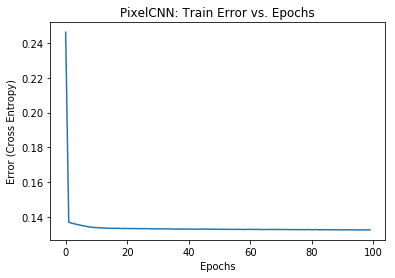

In [7]:
from matplotlib import pyplot as plt

x = np.array([i for i in range(100)])
y1 = np.array(train_err)

_ = plt.plot(x, y1)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Train Error vs. Epochs")
_ = plt.show()

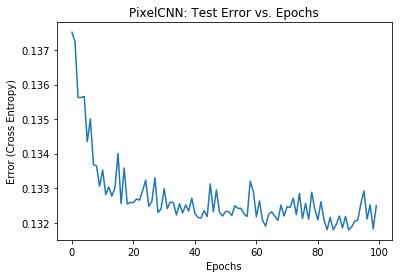

In [8]:
y2 = np.array(test_err)

_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Test Error vs. Epochs")
_ = plt.show()

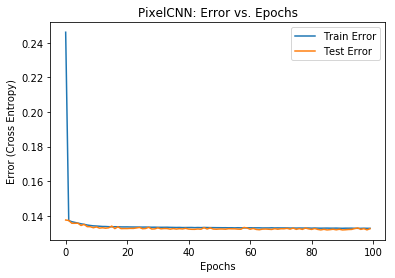

In [11]:
_ = plt.plot(x, y1)
_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Error vs. Epochs")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.show()

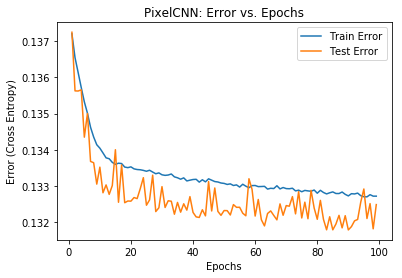

In [12]:
_ = plt.plot(x[1:], y1[1:])
_ = plt.plot(x[1:], y2[1:])
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Error vs. Epochs (Starting from First Epoch)")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.show()